# Lab 2

### question 1

Epoch 1, Sample 0: [ERROR] weights: [-1.  1.  0.]
Epoch 1, Sample 1: [ERROR] weights: [0.   1.   0.25]
Epoch 1, Sample 2: 	   weights: [0.   1.   0.25]
Epoch 1, Sample 3: [ERROR] weights: [-1.    0.    1.25]
Epoch 2, Sample 0: 	   weights: [-1.    0.    1.25]
Epoch 2, Sample 1: [ERROR] weights: [0.  0.  1.5]
Epoch 2, Sample 2: 	   weights: [0.  0.  1.5]
Epoch 2, Sample 3: 	   weights: [0.  0.  1.5]
Epoch 3, Sample 0: [ERROR] weights: [-1.   1.   1.5]
Epoch 3, Sample 1: [ERROR] weights: [0.   1.   1.75]
Epoch 3, Sample 2: 	   weights: [0.   1.   1.75]
Epoch 3, Sample 3: 	   weights: [0.   1.   1.75]


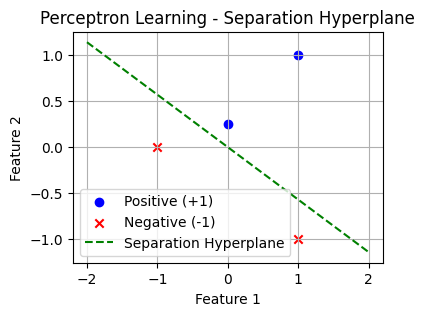

In [96]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-1, 0, 1, 1, 0, 0.25, 1, -1]).reshape(2, -1)
y = np.array([-1, +1, +1, -1])
n_samples = X.shape[1]

bias = np.ones((1,n_samples))
X = np.vstack((bias, X))

num_features = A.shape[0]
w = np.zeros(num_features)

l_rate = 1
n_epochs = 3

def sign(z):
    return 1 if z >= 0 else -1

for epoch in range(1, n_epochs + 1):
    for i in range(X.shape[1]):
        x_i = X[:, i]
        y_i = y[i]
        z = np.dot(w, x_i)
        y_pred = sign(z)
        if y_pred != y_i:
            w += l_rate * y_i * x_i
            print(f"Epoch {epoch}, Sample {i}: [ERROR] weights: {w}")
        else:
            print(f"Epoch {epoch}, Sample {i}: \t   weights: {w}")

plot_hyperplane(X,y,w)


In [94]:
def plot_hyperplane(X, y, w):
    # Extract original features without bias
    X_original = X[1:, :]  # Shape (2, n_samples)
    x1 = X_original[0]
    x2 = X_original[1]

    # Separate the points based on their labels
    pos_indices = y == 1
    neg_indices = y == -1

    plt.figure(figsize=(4,3))
    plt.scatter(x1[pos_indices], x2[pos_indices], color='b', marker='o', label='Positive (+1)')
    plt.scatter(x1[neg_indices], x2[neg_indices], color='r', marker='x', label='Negative (-1)')

    # Create a range of values for x1 to plot the hyperplane
    x1_min, x1_max = min(x1)-1, max(x1)+1
    x_values = np.linspace(x1_min, x1_max, 200)

    # Calculate corresponding x2 values for the hyperplane
    # w0 + w1*x1 + w2*x2 = 0 => x2 = (-w0 - w1*x1)/w2
    if w[2] != 0:
        x2_values = (-w[0] - w[1] * x_values) / w[2]
        plt.plot(x_values, x2_values, 'g--', label='Separation Hyperplane')
    else:
        # Avoid division by zero; plot a vertical line
        x = -w[0] / w[1]
        plt.axvline(x=x, color='g', linestyle='--', label='Separation Hyperplane')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Learning - Separation Hyperplane')
    plt.legend()
    plt.grid(True)
    plt.show()